## Language Processing assignment 3: Word embeddings and society

In this assignment you will have to load vectorial representations of words and calculate their cosine similarity, a common distance metric to evaluate semantic similarity.

On grading: There are six exercises in this assignment. You must have at least three correct exercises (and among the incorrect ones, there should be some proper attempt to solve the missing exercises). What we mean is that if you do three perfect exercises but the remaining two exercises are blank, the assignment will not be considered passed.

In [1]:
import numpy as np
import math

 #### Exercise 1:
 
In order to play with word embeddings, we need a way of storing them in our program. We need a data structure to represent all the word embeddings.

The goal of this exercise is to open the file where the embeddings are saved and to put them in a variable that you can use afterwards.

You can represent the data in the way that you think it fits best. The result can go from a really simple approach until a complex but useful class.

Given a word, such as `"house"`, this data structure should return the embeddings related to that word.

In the saved file, we will have a set of words, and each word will be represented as a sequence of floating point numbers, such as:

`house --> 0.001 0.002 0.005 0.001 0.0012312 0.004 ...`

`cow --> 0.2 0.01 0.00031 0.01 0.9 0.00031 0.0015 0.002 ...`

The number of floating point numbers will always be the same.

---
 
If we want to play with word embeddings, we have to get them from somewhere. Pick English embeddings from [Absalon](https://absalon.ku.dk/files/7371057/download?download_frd=1) or the embeddings that you want from this [website](https://fasttext.cc/docs/en/crawl-vectors.html). I recommend you downloading the file from Absalon, as it contains only 50,000 words and it is easier to load (well, faster).

If you get the embeddings from the Github page, you should download the embeddings in **text** format. These embeddings have been trained with raw text from Wikipedia. This may take some space in your computer, depending on the language you choose.

Once you downloaded the embeddings, it's time to start programming! The files follow a specific format.

##### FILE FORMAT:

The first line in the file contains two numbers separated by a single space. The first number indicates the number of words in the file (`N_WORDS`) and the second number specifies the number of dimensions (`N_DIMENSIONS`) that are used to represent each of those words.

After the first line, each line will contain one word at the beginning. Following the word, and separated by spaces, there will be `N_DIMENSIONS` numbers, which represent each word in the space.

The words are sorted by their frequency in the wikipedia corpus, then the first words in the file will be the most frequent ones. Here you can see how the English embeddings file starts:

`9999 300`

`, 0.1250 -0.1079 0.0245 -0.2529 0.1057 -0.0184 0.1177 ...`

`the -0.0517 0.0740 -0.0131 0.0447 -0.0343 0.0212 0.0069 ...`

`. 0.0342 -0.0801 0.1162 -0.3968 -0.0147 -0.0533 0.0606 ...`

`and 0.0082 -0.0899 0.0265 -0.0086 -0.0609 0.0068 0.0652 ...`

`...`

##### What you have to do:

Write a program to read the file and store the words and their embeddings in the data structure that you think it is the best. It might be very simple, or it might be a more complex one.

##### Important note: You are not allowed to use a package like gensim to open the file

In [2]:
#1.- Define object to save words and their embeddings
#2.- Write code for reading the file and save it in the defined object

#YOUR CODE HERE
import numpy as np
word2vec = {} # create a dictionary to store words and their embeddings.
with open('wiki.en.vec.short50K') as f:
    word_number, vector_length = f.readline().split()
    word_number = int(word_number)
    vector_length = int(vector_length)
    for line in f:
        line_list = line.split()
        if (len(line_list) != vector_length + 1): # process the embedding of ' '
            word2vec[' '] = np.array([float(n) for n in line_list]) 
        else:
            starting_index = line.find(line_list[1]) # handle duplications introduced by string.split()
            word2vec[line[:starting_index - 1]] = np.array([float(n) for n in line_list[1:]]) 
    print(len(word2vec) == word_number)
    print(len(word2vec['a']))

True
300


#### Exercise 2:

A common distance metric used to measure the similarity between two words is the cosine similarity, which measures the cosine of the angle between the two vectors that represent each of the words.

This similarity value is calculated by using this formula:

$$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\|_2 \|\mathbf{B}\|_2} $$

<!--= \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }-->

Don't be scared. The first part of the formula, $\mathbf{A} \cdot \mathbf{B}$ is the dot product between vectors $\mathbf{A}$ and $\mathbf{B}$. And you know how to do that in Python.

$\mathbf{A} \cdot \mathbf{B} = \sum\limits_{i=1}^{n}{A_i  B_i}$

In the lower part, $\|\mathbf{A}\|_2 \|\mathbf{B}\|_2$, you have to calculate the Euclidean norm of each vector ($\mathbf{A}$ and $\mathbf{B}$) and multiply their results. The Euclidean norm is calculated using this formula:

$\|\mathbf{A}\|_2 = \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}$

The formula inside the square root is the same as the one from the dot product. Then it can be rewritten like this:

$\|\mathbf{A}\|_2 = \sqrt{\sum\limits_{i=1}^{n}{A_i^2}} = \sqrt{\mathbf{A} \cdot \mathbf{A}} $

You should program the cosine similarity function by using numpy. You cannot use previously programmed cosine similarity functions, you must write your own function. This program must get two numpy arrays and it should return a number.

The resulting number of this formula should be interpreted as a number that specifies the similarity between two words. The higher the number, the similarity between those two words will be higher.

In [3]:
def similarity(A, B):
    #YOUR CODE HERE
    return np.dot(A, B) / (np.sqrt(np.dot(A, A)) * np.sqrt(np.dot(B, B)))
similarity(np.array([1, 2, 3]), np.array([1, 2, 3]))

1.0

#### Exercise 3:

In the third exercise you have to squeeze your brain a bit more. Now, you have loaded the whole embedding file, and you also have a distance metric to measure the similarity between words. Let's do more complex things, then.

Given a word, you have to find the 30 most similar words. Then, given one word you should get the distance to all the words in the embeddings file, and pick the nearest ones.

In order to make this task easier, I attach a simple implementation of an ordered list.

In [4]:
#This function should return the embeddings of a word according to your class
def get (LIST, index):
    return LIST[index]

def get_value(el):
    return el[1]



class OrderedListTuple:
    
    def __init__(self, max_size):
        self.content = []
        self.max_size = max_size
        
    def find_pos (self, element):
        index = 0
        while (index <= len(self.content)-1) and get_value(get(self.content, index)) > get_value(element):
            index += 1
        return index

    def insert_element (self, element):
        pos = self.find_pos (element)
        self.content.insert (pos, element)
        if len(self.content) > self.max_size:
            self.content.pop()

This implementation is very simple. When we initialize the list, we set the number of elements that it will have at most. Then, when we add elements to the list, it will add the element in the correct position. But, if the number of elements is higher than the ones that we can keep, the object will remove the last element. Let's see how it works with an example:

In [5]:
L = OrderedListTuple(4)
print (L.content)

L.insert_element(("house", 14))
print (L.content)
L.insert_element(("home", 6))
print (L.content)
L.insert_element(("brown", 3))
print (L.content)
L.insert_element(("elbow", 4))
print (L.content)
L.insert_element(("high", 1))
print (L.content)
L.insert_element(("the", 9))
print (L.content)
L.insert_element(("and", 43))
print (L.content)
L.insert_element(("kitty", 44))
print (L.content)

[]
[('house', 14)]
[('house', 14), ('home', 6)]
[('house', 14), ('home', 6), ('brown', 3)]
[('house', 14), ('home', 6), ('elbow', 4), ('brown', 3)]
[('house', 14), ('home', 6), ('elbow', 4), ('brown', 3)]
[('house', 14), ('the', 9), ('home', 6), ('elbow', 4)]
[('and', 43), ('house', 14), ('the', 9), ('home', 6)]
[('kitty', 44), ('and', 43), ('house', 14), ('the', 9)]


##### Hint: Why don't you create a similarity function that gets two words, and it returns a tuple? For each word in the dictionary, you can calculate the similarity to an input word, and save this in a tuple. Then, using the previous data structure, you can save only the N-best words.

With this data structure, you should be able to get the most similar words to one word.

In [6]:
#YOUR CODE HERE
query_word = 'hi'
nearest_30_words = OrderedListTuple(30)
for word in word2vec.keys():
    dis = similarity(word2vec[query_word], word2vec[word])
    nearest_30_words.insert_element((word, dis))

print(nearest_30_words.content)

[('hi', 1.0), ('hello', 0.5977723609366353), ('teahouse', 0.5335621540492963), ('hey', 0.525167301428226), ('thankyou', 0.47517235995041396), ('thank', 0.472482012553265), ('welcome', 0.4669999708493511), ('yeh', 0.45915536871729445), ('haha', 0.4580143104819826), ('wondering', 0.4513551689838531), ('e/c', 0.4512011686221762), ('thanks', 0.45046507486020193), ('!', 0.44207923221814327), ('huh', 0.4366182393333329), ('guys', 0.43549323027198805), ('glad', 0.4301472480301115), ('fyi', 0.4276645430139309), ('sorry', 0.4265883328952608), ('btw', 0.424950023410508), ('heh', 0.42427025363994353), ('yeah', 0.41901551957353256), ('yep', 0.41813036657250763), ('lol', 0.4160081907654485), ('ho', 0.4145072555028499), ('ahh', 0.41330567490000225), ('nrg', 0.4113601767761329), ('thx', 0.411347409085337), ('jayron', 0.40702838256271623), ('okay', 0.40471536603795905), ('dear', 0.4044119726294408)]


#### Exercise 4:

The last exercise is really cool. One of the properties that researchers found in word embeddings was that we could perform algebraic operations over the vectors in order to get specific words.

For example, if we perform an operation like this one:

$$DICTIONARY['berlin'] - DICTIONARY['germany'] + DICTIONARY['france']$$

This results in a vector. If we find the 20 closest words to that vector, we should be able to see that the word `Germany` will be near. Another nice operation was:

$$DICTIONARY['queen'] - DICTIONARY['woman'] + DICTIONARY['man']$$

Perform this operations with the words you want, and check if it works.

In [7]:
#YOUR CODE HERE
#berlin - germany + france
new_vec = word2vec['berlin'] - word2vec['germany'] + word2vec['france']
nearest_20_words = OrderedListTuple(20)
for word in word2vec.keys():
    dis = similarity(new_vec, word2vec[word])
    nearest_20_words.insert_element((word, dis))

for ele in nearest_20_words.content:
    print(ele)

('paris', 0.7745821281649257)
('berlin', 0.6806360501069306)
('france', 0.6234364339620112)
('marseille', 0.6068132959916013)
('toulouse', 0.6053895238433366)
('montpellier', 0.5917006165578015)
('rouen', 0.5914574790560799)
('avignon', 0.5890789796674709)
('rennes', 0.5850185342314215)
('ferrand', 0.584437310110859)
('brussels', 0.5783981772734191)
('nantes', 0.5750482980258821)
('bordeaux', 0.5732881366656536)
('marseilles', 0.5714683689465663)
('boulogne', 0.5677972274128383)
('neuilly', 0.5665287787178918)
('grenoble', 0.5660398964645867)
('lille', 0.5642594745563222)
('provence', 0.5618433958267668)
('poitiers', 0.5582482663698829)


In [8]:
#YOUR CODE HERE
#queen - woman + man
new_vec = word2vec['queen'] - word2vec['woman'] + word2vec['man']
nearest_20_words = OrderedListTuple(20)
for word in word2vec.keys():
    dis = similarity(new_vec, word2vec[word])
    nearest_20_words.insert_element((word, dis))

for ele in nearest_20_words.content:
    print(ele)

('queen', 0.7898672082967787)
('king', 0.6429407513059967)
('majesty', 0.5372264198483584)
('monarch', 0.5126070187949004)
('crown', 0.469760687497465)
('queens', 0.4569217657524951)
('whitehall', 0.4508493631090601)
('reign', 0.44983602827631264)
('coronation', 0.44729696911956957)
('royal', 0.43049023386023005)
('regent', 0.42783651706315434)
('jubilee', 0.42361938568326174)
('kings', 0.4204812926368349)
('prince', 0.41842767724878543)
('connaught', 0.4147187331471937)
('consort', 0.4101795096405899)
('princess', 0.40904831868562314)
('throne', 0.4079527608266969)
('pretender', 0.40745142030398623)
('elizabeth', 0.4070293809206282)


#### Exercise 5:

In recent years, many researchers have shown that word embeddings obtained from large corpora reproduce biases that happen in society.

In this exercise, we would like to ask you to try to show some examples in the loaded word embedding file that show some sort of bias. This bias can be either of these, or any other bias you are interested:

 * Gender
 * Origin
 * Sexual preference
 * Socioeconomic class
 * Academic background
 
These examples could be based on distances between words, but any other creative methodology that you could think of will be well considered as well.

For instance, what is the distance between "maid" and "man", and "maid" and "woman"?

You should provide examples but also your interpretation of these results.

If you want to get some inspiration, you may want to check some recent articles about the topic:

  * Bender, Emily M., and Batya Friedman. "Data statements for natural language processing: Toward mitigating system bias and enabling better science." Transactions of the Association for Computational Linguistics 6 (2018): 587-604. https://aclanthology.org/Q18-1041/
  * Hovy, Dirk, and Shrimai Prabhumoye. "Five sources of bias in natural language processing." Language and Linguistics Compass 15.8 (2021): e12432. https://compass.onlinelibrary.wiley.com/doi/10.1111/lnc3.12432

In [9]:
#YOUR CODE HERE
# instance:
print('instance:')
print(similarity(word2vec['maid'], word2vec['man']))
print(similarity(word2vec['maid'], word2vec['woman']))
# Gender
print('Gender:') # From ChatGPT
print(similarity(word2vec['nurse'], word2vec['she']))
print(similarity(word2vec['nurse'], word2vec['he']))
# Origen
print('Origen:')
print(similarity(word2vec['noodle'], word2vec['china']))
print(similarity(word2vec['noodle'], word2vec['denmark']))
# Sexual preference
print('Sexual preference:')
print(similarity(word2vec['queer'], word2vec['man']))
print(similarity(word2vec['queer'], word2vec['woman']))
# Socioeconomic class
print('Socioeconomic class:')
print(similarity(word2vec['porsche'], word2vec['elite']))
print(similarity(word2vec['porsche'], word2vec['normal']))
# Academic background
print('Academic background:')
print(similarity(word2vec['engineer'], word2vec['computer']))
print(similarity(word2vec['engineer'], word2vec['building']))


instance:
0.4272625913611659
0.6025203133248225
Gender:
0.40251331628816867
0.24889993972693591
Origen:
0.31418397654228747
0.09570860518933459
Sexual preference:
0.2779357787420189
0.3390544125824317
Socioeconomic class:
0.24819745789478662
0.10555141468182044
Academic background:
0.2926383594371341
0.2669620695714518


YOUR INTERPRETATION HERE (press ENTER to write)  
Basically, bias shows a stronger relation to certain words than other words. This is caused by the biased training data. And, bias usually represents stereotypes, prejudices, phenomenons, but also true connections.   
- Gender
'nurse' is closer to 'she'. This shows a fact that female burses are much more than male nurses, and shows a stereotype that when speaking of nurse, we might think it is a female nurse.  
- Origen
In this example, 'noodle' is closer to 'china' than 'denmark', which suggests that noodles might be more popular in China. 
- Sexual preference
Ths distance between 'queer' and 'man' is lower than that of 'queer' and 'woman', which might suggests a prejudice.
- Socioeconomic class
'porsche' is a car brand and usually expensive. So, it is more related to 'elite' rather than 'normal' people.
- Academic background
In this case, the bias is not too obvious, but is still shows a perfection of 'computer'. This might suggest that there are more data that talks about engineers in computer science rather than Mechanical engineer. 

#### Exercise 6

In this exercise we are going to see how to calculate word counts normalized by document frequency (TF-IDF).

To this end, we will calculate the word frequencies and the IDF normalized counts using a Python package called TFIDFvectorizer from Scikit-Learn.

We will work with the Gutenberg corpus from NLTK.

In [10]:
from nltk.corpus import gutenberg
import nltk

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
fileids = gutenberg.fileids()
print(len(fileids))
fileids

18


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [12]:
corpus = []
for fileid in fileids:
    corpus.append(nltk.corpus.gutenberg.raw(fileid))

In [13]:
#Step 1: Learn vocabulary and idf, return document-term matrix.
vec_tfidf = TfidfVectorizer() 
result_tfidf = vec_tfidf.fit_transform(corpus).toarray()
print(result_tfidf.shape)
#Step 2: Create id-to-word dictionary.
id2word = {vec_tfidf.vocabulary_[key]:key for key in vec_tfidf.vocabulary_.keys()}
for ite in id2word.items():
    print(ite[0], ite[1])
    break
#Step 3: Sort the term frequencies of 'blake-poems.txt' and returns the sorted indexes
sorted_ids_blake = np.argsort(result_tfidf[4]).reshape(-1)

#Step 4: Print the top 10 TF-IDF scores and corresponding words. 
for id in sorted_ids_blake[-10:]:
    print (id2word[id],result_tfidf[4][id])

(18, 42063)
12467 emma
he 0.08135534295322783
his 0.08280811693453548
thee 0.08905556490592986
with 0.09588308276630424
my 0.1205802404485341
to 0.16125791192514802
in 0.20484113136437723
of 0.21210500127091542
and 0.5055653454950587
the 0.6377677777940539


##### Exercise 6.1:
- Explain using your own words and in one single sentence (per step) what happens in each step.
###### Step 1: YOUR SENTENCE HERE
- Learn vocabulary and idf, return document-term matrix.
###### Step 2: YOUR SENTENCE HERE
- Create id-to-word dictionary.
###### Step 3: YOUR SENTENCE HERE
- Sort the term frequencies of 'blake-poems.txt' and returns the sorted indexes.
###### Step 4: YOUR SENTENCE HERE
- Print the top 10 TF-IDF scores and corresponding words. 

#### Exercise 6.2:
Can you check what are the top-10 most relevant words based on their inverse document frequency? I am asking for the 10 words with the highest inverse document frequency.

If you do not know how to get the IDFs of the words, you may want to take a look at the documentation of the TFIDFvectorizer.

In [14]:
#YOUR CODE HERE
idf_vector = vec_tfidf.idf_ # Get Idf
print(idf_vector.shape)
idf_vector_idx = np.argsort(idf_vector)
print('Top 10 most relevant words:')
for idx in idf_vector_idx[-10:]:
    print(idf_vector[idx], idx, id2word[idx])

(42063,)
Top 10 most relevant words:
3.2512917986064953 18404 hummingly
3.2512917986064953 18402 hummer
3.2512917986064953 18401 hummed
3.2512917986064953 18399 humiliations
3.2512917986064953 18396 humiliates
3.2512917986064953 18392 humh
3.2512917986064953 18390 humboldt
3.2512917986064953 18388 humbling
3.2512917986064953 18386 humblest
3.2512917986064953 42062 zuzims


3.2512917986064953 18331 howsoever
3.2512917986064953 18385 humbles
3.2512917986064953 18387 humbleth
3.2512917986064953 18438 hungerbitten
3.2512917986064953 18432 hundredfold
3.2512917986064953 18430 hunchbacks
3.2512917986064953 18429 hunchback
3.2512917986064953 18428 hunch
3.2512917986064953 18427 hun
3.2512917986064953 18426 humtah


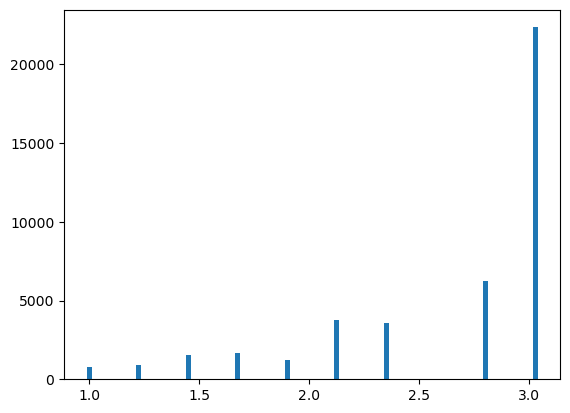

In [15]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6.5))
plt.hist(idf_vector, align = 'left', rwidth = 0.1)
for idx in idf_vector_idx[-30:-20]:
    print(idf_vector[idx], idx, id2word[idx])

#### Exercise 6.3:

How do the inverse document frequencies look like in this corpus? Do they seem relevant? Please state that in 1-2 sentences

#### YOUR RESPONSE HERE
- Lots of words have the idf value equal to 3.2512917986064953. 
- Some words with the same idf value are relevant, like hunchbacks, hunchback and hunch, but there are lots of irrelevant words even they have the same idf value. 